# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">ĐẶT VÀ TRẢ LỜI CÂU HỎI</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> KHÁM PHÁ, THỐNG KÊ CỦA TOP CÁC CA KHÚC TRÊN SPOTIFY</p>

---

# **Import các thư viện**

In [69]:
# !pip install squarify
# !pip install pycountry
# !pip install basemap
# !pip install geopandas
# !pip install folium

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import plotly.graph_objects as go
import plotly.express as px
import squarify
import pycountry

# **Thông tin về dữ liệu**<br>
Dữ liệu được sử dụng trong bài được lấy từ trang: <a href = "https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv"> https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv</a><br>
Dataset chứa các ca khúc nằm trong TOP 200 ca khúc hay nhất trong 1 tuần của mỗi quốc gia từ 2021/02/04 ~ 2022/07/14

Theo như file "README.md":
> This directory contains codes that I used to create the dataset: https://www.kaggle.com/datasets/yelexa/spotify200<br><br>To create the dataset, I downloaded the csv files from the 'Weekly Top Songs' charts on Spotify Charts for each country from the week of 2021/02/04 ~ 2022/07/14. For the 'Global' charts, there is data from the week of 2016/12/29 ~ 2022/07/14. I used concat.py to create one combined file for each country, then used data.py to collect additional data for each song from the Spotify API.<br><br>The dataset was aggregated into an interactive dashboard, where you can explore artists and music trends around the world: https://public.tableau.com/app/profile/yejielee/viz/TheModernARExperienceWhichGlobalArtistWillYouSign/ar_dashboard?publish=yes

Đọc dữ liệu từ file csv

In [71]:
spotify_df = pd.read_csv("./features/processed.csv")

In [72]:
display(spotify_df)

uri  rank  \
0        spotify:track:2gpQi3hbcUAcEG8m2dlgfB     1   
1        spotify:track:2x8oBuYaObjqHqgGuIUZ0b     2   
2        spotify:track:2SJZdZ5DLtlRosJ2xHJJJa     3   
3        spotify:track:1O2pcBJGej0pmH2Y9XZMs6     5   
4        spotify:track:1TpZKxGnHp37ohJRszTSiq     6   
...                                       ...   ...   
1109515  spotify:track:68EMU2RD1ECNeOeJ5qAXCV   190   
1109516  spotify:track:51bYFYWODfYOZU0rwvjiCc   195   
1109517  spotify:track:0vLXpeE2Z7iVvcba8PAwwI   196   
1109518  spotify:track:1XGmzt0PVuFgQYYnV2It7A   197   
1109519  spotify:track:6JIC3hbC28JZKZ8AlAqX8h   199   

                       artist_names  artists_num artist_individual  \
0                      Paulo Londra            1      Paulo Londra   
1                               WOS            1               WOS   
2                      Paulo Londra            1      Paulo Londra   
3                           Cris Mj            1           Cris Mj   
4                            Emilia            1            Emilia   
...                             ...          ...               ...   
1109515  Charlie Puth, Selena Gomez            2      Charlie Puth   
1109516                   Binz, Đen            2              Binz   
1109517             Kai Đinh, SIVAN            2          Kai Đinh   
1109518       Maroon 5, Wiz Khalifa            2          Maroon 5   
1109519  Elton John, Dua Lipa, PNAU            3        Elton John   

                                     artist_id       artist_genre  \
0        spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z  argentine hip hop   
1        spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK    argentine indie   
2        spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z  argentine hip hop   
3        spotify:artist:1Yj5Xey7kTwvZla8sqdsdE     urbano chileno   
4        spotify:artist:0AqlFI0tz2DsEoJlKSIiT9      pop argentino   
...                                        ...                ...   
1109515  spotify:artist:6VuMaDnrHyPL1p4EHjYLi7          dance pop   
1109516  spotify:artist:2nSO7JYDbJrYbJmP39qUzj              v-pop   
1109517  spotify:artist:3E6LGptA8lBEXPHAQCE3vr              v-pop   
1109518  spotify:artist:04gDigrS5kc9YWfZHwBETP                pop   
1109519  spotify:artist:3PhoLpVuITZKcymswpck5b        mellow gold   

                                                artist_img  \
0        https://i.scdn.co/image/ab6761610000e5ebf796a9...   
1        https://i.scdn.co/image/ab6761610000e5eb75e151...   
2        https://i.scdn.co/image/ab6761610000e5ebf796a9...   
3        https://i.scdn.co/image/ab6761610000e5eb8f4ebc...   
4        https://i.scdn.co/image/ab6761610000e5ebaf96d1...   
...                                                    ...   
1109515  https://i.scdn.co/image/ab6761610000e5eb0d890f...   
1109516  https://i.scdn.co/image/ab6761610000e5eb6f9ec8...   
1109517  https://i.scdn.co/image/ab6761610000e5eb8c1162...   
1109518  https://i.scdn.co/image/ab6761610000e5eb288ac0...   
1109519  https://i.scdn.co/image/ab6761610000e5eb0a7388...   

                                         track_name release_date  \
0                                            Plan A   2022-03-23   
1                                      ARRANCARMELO   2022-04-06   
2                                            Chance   2022-04-06   
3                             Una Noche en Medellín   2022-01-21   
4                                     cuatro veinte   2022-03-24   
...                                             ...          ...   
1109515  We Don't Talk Anymore (feat. Selena Gomez)   2015-11-05   
1109516                                 Cho Mình Em   2021-04-01   
1109517                 Thế Hệ Tan Vỡ (feat. SIVAN)   2021-11-17   
1109518                                    Payphone   2012-01-01   
1109519                     Cold Heart - PNAU Remix   2021-10-22   

         album_num_tracks                                        album_cover  \
0                     1.0  https://i.scdn.co/image/ab67616d0000b2737e

In [73]:
pattern = '%Y-%m-%d'
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], format=pattern)
spotify_df['week'] = pd.to_datetime(spotify_df['week'], format=pattern)

***

# **Đưa ra các câu hỏi cần trả lời:**



### **Câu 1**: Số lượng ca khúc được stream ở từng nơi ?

In [74]:
# from mpl_toolkits.basemap import Basemap
import geopandas

**Bước 1** Tìm số lượng ca khúc được stream ở mỗi Quốc Gia<br>
- Ta groupby `country` và chọn ra những `uri` độc nhất và đếm chúng bằng hàm `nunique`.

In [75]:
country_num_uri = spotify_df[spotify_df.country!="Global"].groupby("country")["uri"].nunique().to_frame().reset_index()
country_num_uri

country   uri
0        Argentina  1079
1        Australia  1305
2          Austria  2002
3          Belarus   495
4          Belgium  1576
..             ...   ...
68  United Kingdom  1633
69   United States  1829
70         Uruguay  1139
71       Venezuela   418
72         Vietnam  1126

[73 rows x 2 columns]

- Đọc dataframe về tọa độ của các Quốc Gia từ thư viện `geopandas`

In [76]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

Kết hợp giữa DataFrame tọa độ Quốc Gia và DataFrame số lượng ca khúc theo tên của các Quốc Gia 

In [77]:
table = world.merge(country_num_uri, how = "left", left_on = ["name"], right_on = ["country"])

In [78]:
table

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry country     uri  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...     NaN     NaN  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...     NaN     NaN  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...     NaN     NaN  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  Canada  1785.0  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...     NaN     NaN  
..                                                 ...     ...     ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...     NaN     NaN  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...     NaN     NaN  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...     NaN     NaN  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...     NaN     NaN  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...     NaN     NaN  

[177 rows x 8 columns]

Kiểm tra xem các Quốc Gia trong DataFrame số lượng ca khúc có sai chính ta so với tên Quốc Gia ở trong DataFrame tọa độ

In [79]:
name = list(table["name"].values)
set(table["country"].apply(lambda x: x if x not in name else " "))

{' ', nan}

Loại bỏ đi các Quốc Gia không không có trong bộ dữ liệu

In [80]:
table = table.dropna(subset = ["country"])

In [81]:
table

pop_est      continent          name iso_a3  gdp_md_est  \
3     37589262.0  North America        Canada    CAN     1736425   
5     18513930.0           Asia    Kazakhstan    KAZ      181665   
8    270625568.0           Asia     Indonesia    IDN     1119190   
9     44938712.0  South America     Argentina    ARG      445445   
10    18952038.0  South America         Chile    CHL      282318   
..           ...            ...           ...    ...         ...   
156    7044636.0  South America      Paraguay    PRY       38145   
158   34268528.0           Asia  Saudi Arabia    SAU      792966   
161    1198575.0           Asia        Cyprus    CYP       24948   
162   36471769.0         Africa       Morocco    MAR      119700   
163  100388073.0         Africa         Egypt    EGY      303092   

                                              geometry       country     uri  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...        Canada  1785.0  
5    POLYGON ((87.35997 49.21498, 86.59878 48.54918...    Kazakhstan   486.0  
8    MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...     Indonesia   921.0  
9    MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...     Argentina  1079.0  
10   MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...         Chile  1141.0  
..                                                 ...           ...     ...  
156  POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...      Paraguay   916.0  
158  POLYGON ((34.95604 29.35655, 36.06894 29.19749...  Saudi Arabia  1239.0  
161  POLYGON ((32.73178 35.14003, 32.91957 35.08783...        Cyprus  1520.0  
162  POLYGON ((-2.16991 35.16840, -1.79299 34.52792...       Morocco  1432.0  
163  POLYGON ((36.86623 22.00000, 32.90000 22.00000...         Egypt  1048.0  

[67 rows x 8 columns]

**Trực quan hóa dữ liệu**<br>

**Cách 1** Sử dụng `Folium`

In [82]:
import folium
my_map = folium.Map()
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['country', 'uri'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Số lượng ca khúc ở mỗi Quốc Gia'
).add_to(my_map)
my_map.save('Number_song.html')


**Cách 2** Sử dụng hàm plot của đồ DataFrame để tự điều chỉnh đồ thị hợp lí

Text(0.5, 1.0, 'Số lượng ca khúc ở mỗi Quốc Gia')

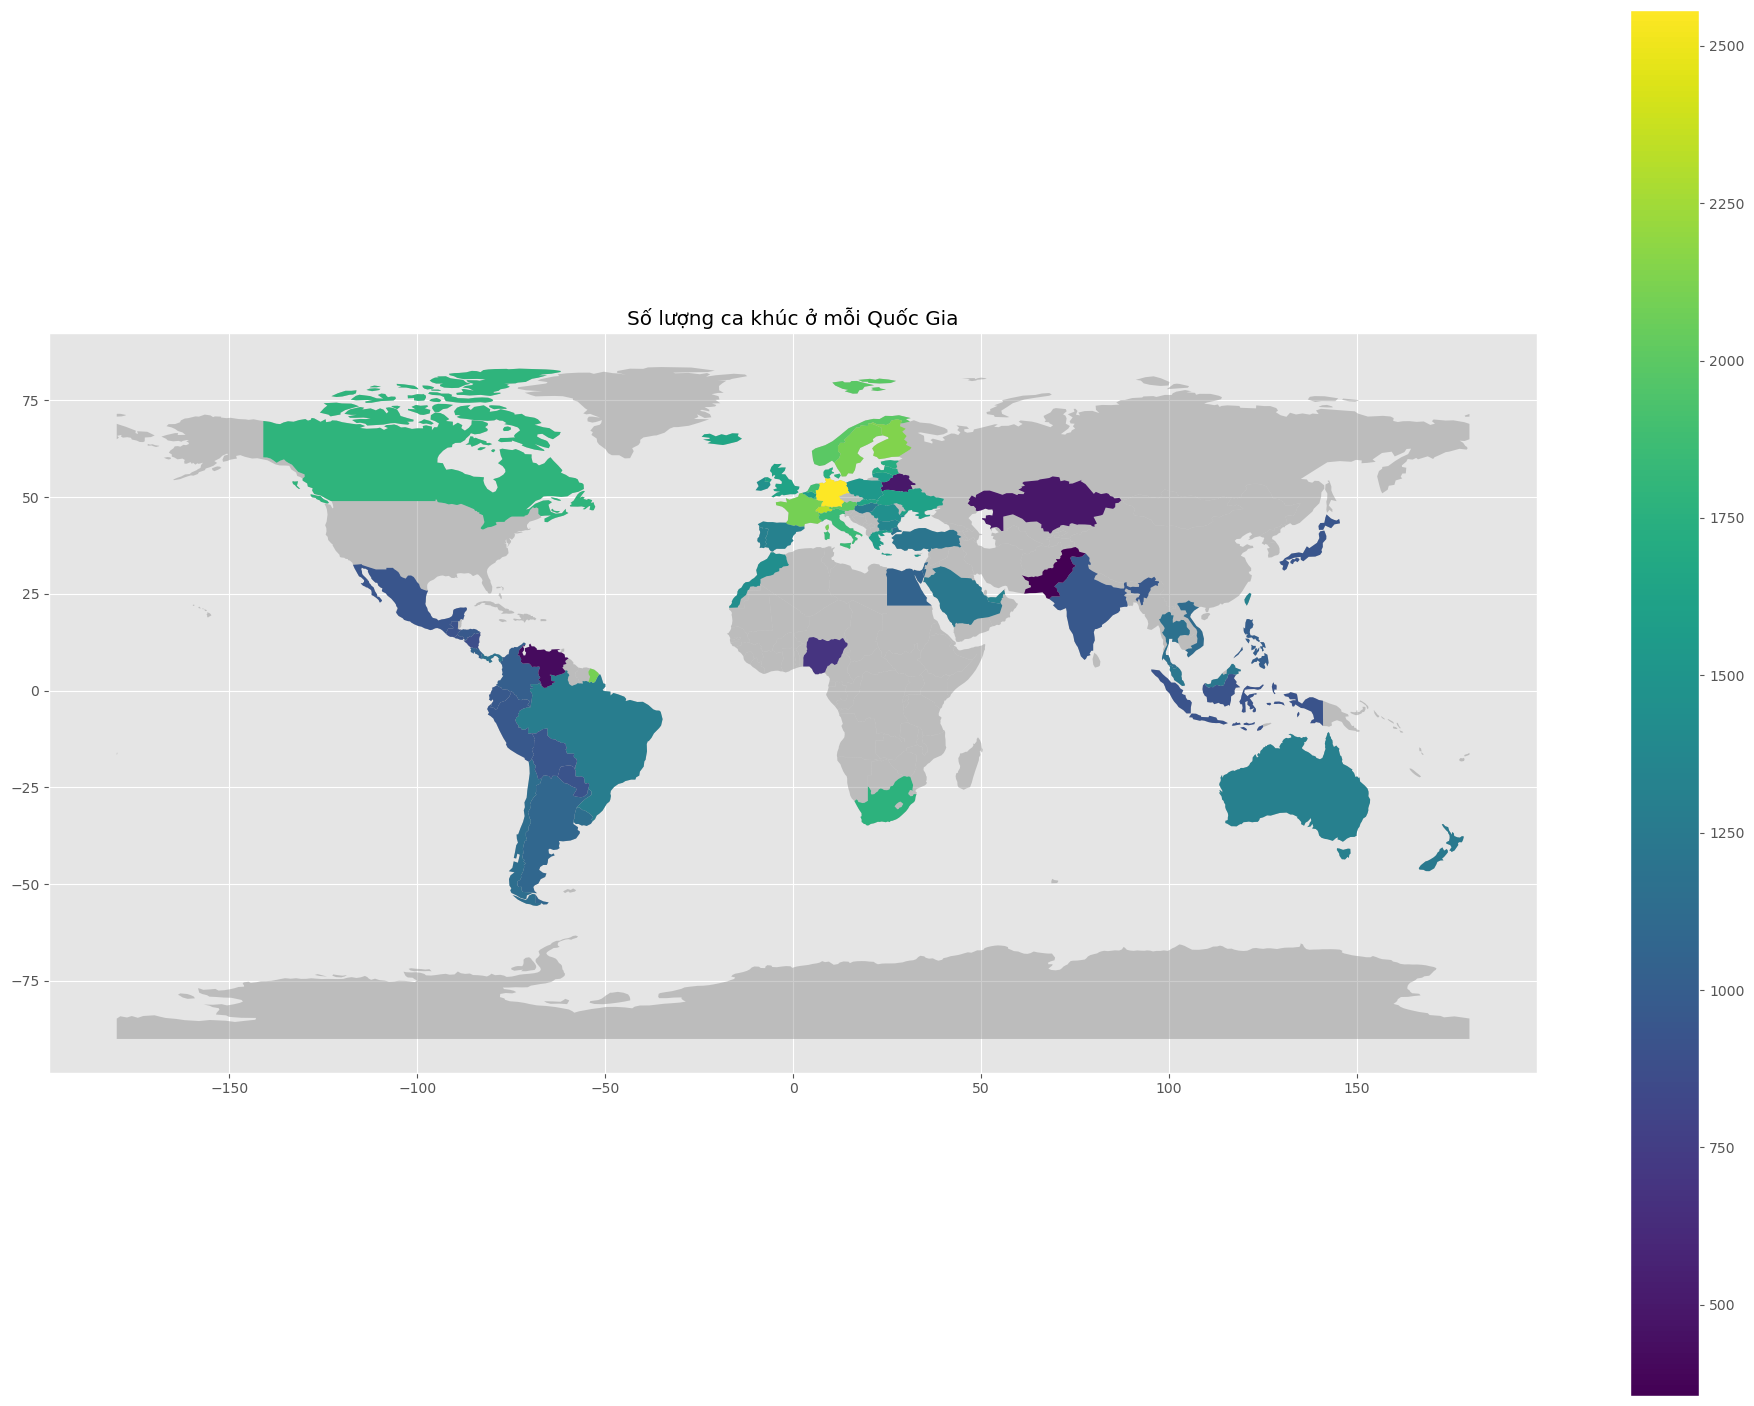

In [83]:
geo_df = country_num_uri
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
table.plot(column="uri", ax=ax, legend=True)
plt.title("Số lượng ca khúc ở mỗi Quốc Gia")
# ax.set_yticks([500,2000])

---

### **Câu hỏi 2**: Ca khúc nào có được nhiều sự yêu thích ở các Quốc gia ?

Ca khúc được yêu thích dựa trên các yếu tố như: <br>
+ Được lên top 10 Quốc gia.
+ Có được thời gian trong top lâu nhất liên tục qua các quá trình cập nhật.

Đầu tiên xét ở một quốc gia nhỏ như Việt Nam trước khi đến toàn bộ Quốc gia của dataset đề cập.

Kiểm tra lại các cột trước khi tiến hành trả lời câu hỏi.

In [84]:
spotify_df.columns

Index(['uri', 'rank', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'artist_img', 'track_name', 'release_date',
       'album_num_tracks', 'album_cover', 'source', 'peak_rank',
       'previous_rank', 'weeks_on_chart', 'streams', 'week', 'danceability',
       'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration',
       'country', 'region', 'language', 'pivot'],
      dtype='object')

In [85]:
cols = ["uri", "rank", "artist_names", "track_name", "week", "streams", "country"]
spotify_df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109520 entries, 0 to 1109519
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   uri           1109520 non-null  object        
 1   rank          1109520 non-null  int64         
 2   artist_names  1109520 non-null  object        
 3   track_name    1109520 non-null  object        
 4   week          1109520 non-null  datetime64[ns]
 5   streams       1109520 non-null  int64         
 6   country       1109520 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 59.3+ MB


Không có dòng thiếu. Tiến hành trả lời câu hỏi.


**Bước 1**: Chọn các bài hát thuộc Quốc gia Việt Nam

In [86]:
def song_in_country(country):
    return spotify_df[spotify_df.country == country]

In [87]:
song_in_vietnam_df = song_in_country("Vietnam")

**Bước 2**: Chọn các bài hát được đưa lên top 10 Việt Nam

In [88]:
def song_in_top_10(df):
    return df[df["rank"] <= 10]

In [89]:
top10_df = song_in_top_10(song_in_vietnam_df)

**Bước 3**: Tạo một mảng đánh dấu lại các ngày được lên top10

In [90]:
group_weeks = top10_df.groupby("uri")["week"].apply(lambda grp: list(set(grp))).reset_index()

In [91]:
weeks = sorted(top10_df.week.unique())
weeks

[numpy.datetime64('2021-02-04T00:00:00.000000000'),
 numpy.datetime64('2021-02-11T00:00:00.000000000'),
 numpy.datetime64('2021-02-18T00:00:00.000000000'),
 numpy.datetime64('2021-02-25T00:00:00.000000000'),
 numpy.datetime64('2021-03-04T00:00:00.000000000'),
 numpy.datetime64('2021-03-11T00:00:00.000000000'),
 numpy.datetime64('2021-03-18T00:00:00.000000000'),
 numpy.datetime64('2021-03-25T00:00:00.000000000'),
 numpy.datetime64('2021-04-01T00:00:00.000000000'),
 numpy.datetime64('2021-04-08T00:00:00.000000000'),
 numpy.datetime64('2021-04-15T00:00:00.000000000'),
 numpy.datetime64('2021-04-22T00:00:00.000000000'),
 numpy.datetime64('2021-04-29T00:00:00.000000000'),
 numpy.datetime64('2021-05-06T00:00:00.000000000'),
 numpy.datetime64('2021-05-13T00:00:00.000000000'),
 numpy.datetime64('2021-05-20T00:00:00.000000000'),
 numpy.datetime64('2021-05-27T00:00:00.000000000'),
 numpy.datetime64('2021-06-03T00:00:00.000000000'),
 numpy.datetime64('2021-06-10T00:00:00.000000000'),
 numpy.datet

In [92]:
def check_week_series(aWeeks):
    aDates = np.zeros(len(weeks))
    lIndex = [weeks.index(week) for week in aWeeks] # get index from "weeks"
    aDates[lIndex] = 1
    return aDates

In [93]:
group_weeks = top10_df.groupby("uri")["week"].apply(lambda grp: list(set(grp))).reset_index()
group_weeks

uri  \
0    spotify:track:014DA3BdnmD3kI5pBogH7c   
1    spotify:track:04Mm3BineGdy0oNv8NivQT   
2    spotify:track:04bm7NsIhRfTlLGDoKMEw8   
3    spotify:track:05X3a0YGmS1rbH50aL8lGF   
4    spotify:track:0Cy7uOfTjJrmHkNEPBBZxf   
..                                    ...   
125  spotify:track:7lkWAB0Ru7WEa0mkdgiqJG   
126  spotify:track:7ne0bfecn1o29bXC0Xblj2   
127  spotify:track:7rjtRM1AgmmraeTTX8tofW   
128  spotify:track:7uQZVznj0uQOGC9KhV2Mg6   
129  spotify:track:7wkX67ruxr3x2GFz6vyIX9   

                                                  week  
0                                [2021-04-22 00:00:00]  
1           [2022-03-24 00:00:00, 2022-03-31 00:00:00]  
2    [2022-06-02 00:00:00, 2022-06-09 00:00:00, 202...  
3                                [2022-06-30 00:00:00]  
4                                [2022-07-14 00:00:00]  
..                                                 ...  
125  [2022-01-13 00:00:00, 2022-02-24 00:00:00, 202...  
126         [2021-02-11 00:00:00, 2021-02-04 00:00:00]  
127  [2022-05-12 00:00:00, 2022-05-05 00:00:00, 202...  
128  [2021-10-14 00:00:00, 2021-09-16 00:00:00, 202...  
129  [2021-04-15 00:00:00, 2021-11-18 00:00:00, 202...  

[130 rows x 2 columns]

In [94]:
weeks = sorted(top10_df.week.unique())
weeks

[numpy.datetime64('2021-02-04T00:00:00.000000000'),
 numpy.datetime64('2021-02-11T00:00:00.000000000'),
 numpy.datetime64('2021-02-18T00:00:00.000000000'),
 numpy.datetime64('2021-02-25T00:00:00.000000000'),
 numpy.datetime64('2021-03-04T00:00:00.000000000'),
 numpy.datetime64('2021-03-11T00:00:00.000000000'),
 numpy.datetime64('2021-03-18T00:00:00.000000000'),
 numpy.datetime64('2021-03-25T00:00:00.000000000'),
 numpy.datetime64('2021-04-01T00:00:00.000000000'),
 numpy.datetime64('2021-04-08T00:00:00.000000000'),
 numpy.datetime64('2021-04-15T00:00:00.000000000'),
 numpy.datetime64('2021-04-22T00:00:00.000000000'),
 numpy.datetime64('2021-04-29T00:00:00.000000000'),
 numpy.datetime64('2021-05-06T00:00:00.000000000'),
 numpy.datetime64('2021-05-13T00:00:00.000000000'),
 numpy.datetime64('2021-05-20T00:00:00.000000000'),
 numpy.datetime64('2021-05-27T00:00:00.000000000'),
 numpy.datetime64('2021-06-03T00:00:00.000000000'),
 numpy.datetime64('2021-06-10T00:00:00.000000000'),
 numpy.datet

In [95]:
def check_week_series(aWeeks):
    aDates = np.zeros(len(weeks))
    lIndex = [weeks.index(week) for week in aWeeks] # get index from "weeks"
    aDates[lIndex] = 1
    return aDates

In [96]:
# group_weeks["check_date"] = group_weeks.apply(lambda x: check_date_series(x.week), axis =1)
group_weeks["check_week"] = group_weeks.week.apply(check_week_series)
# group_weeks

**Bước 4**: Tính tổng số ngày lên top10 liên tục

In [97]:
def num_week_on_top_continuously(aCheckWeek):
    lCheckWeek = aCheckWeek.tolist()
    if 0 in lCheckWeek:
        idx1 = lCheckWeek.index(1)
        lFromIndex = lCheckWeek[idx1:]
        if 0 in lFromIndex:
            idx0 = lFromIndex.index(0)
            num_week_on_top = sum(lFromIndex[:idx0])
        else:
            num_week_on_top = len(lFromIndex)
    else:
        num_week_on_top = len(lCheckWeek)
    return num_week_on_top

In [98]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
group_weeks["num_week_on_top_continuously"] = group_weeks.check_week.apply(num_week_on_top_continuously)
group_weeks

uri  \
0    spotify:track:014DA3BdnmD3kI5pBogH7c   
1    spotify:track:04Mm3BineGdy0oNv8NivQT   
2    spotify:track:04bm7NsIhRfTlLGDoKMEw8   
3    spotify:track:05X3a0YGmS1rbH50aL8lGF   
4    spotify:track:0Cy7uOfTjJrmHkNEPBBZxf   
..                                    ...   
125  spotify:track:7lkWAB0Ru7WEa0mkdgiqJG   
126  spotify:track:7ne0bfecn1o29bXC0Xblj2   
127  spotify:track:7rjtRM1AgmmraeTTX8tofW   
128  spotify:track:7uQZVznj0uQOGC9KhV2Mg6   
129  spotify:track:7wkX67ruxr3x2GFz6vyIX9   

                                                  week  \
0                                [2021-04-22 00:00:00]   
1           [2022-03-24 00:00:00, 2022-03-31 00:00:00]   
2    [2022-06-02 00:00:00, 2022-06-09 00:00:00, 202...   
3                                [2022-06-30 00:00:00]   
4                                [2022-07-14 00:00:00]   
..                                                 ...   
125  [2022-01-13 00:00:00, 2022-02-24 00:00:00, 202...   
126         [2021-02-11 00:00:00, 2021-02-04 00:00:00]   
127  [2022-05-12 00:00:00, 2022-05-05 00:00:00, 202...   
128  [2021-10-14 00:00:00, 2021-09-16 00:00:00, 202...   
129  [2021-04-15 00:00:00, 2021-11-18 00:00:00, 202...   

                                            check_week  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..                                                 ...   
125  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
126  [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
127  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
128  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
129  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   

     num_week_on_top_continuously  
0                             1.0  
1                             2.0  
2                             4.0  
3                             1.0  
4                             1.0  
..                            ...  
125                           5.0  
126                           2.0  
127                           6.0  
128                           7.0  
129                           9.0  

[130 rows x 4 columns]

In [99]:
top_uri = group_weeks.loc[group_weeks.num_week_on_top_continuously == group_weeks.num_week_on_top_continuously.max()]["uri"].values[0]
top_uri

'spotify:track:1mWdTewIgB3gtBM3TOSFhB'

In [100]:
favorite_song_df = top10_df[top10_df.uri == top_uri]
favorite_song_df

uri  rank artist_names  artists_num  \
1094325  spotify:track:1mWdTewIgB3gtBM3TOSFhB     7          BTS            1   
1094815  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1094926  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1095042  spotify:track:1mWdTewIgB3gtBM3TOSFhB     3          BTS            1   
1095422  spotify:track:1mWdTewIgB3gtBM3TOSFhB     5          BTS            1   
1095650  spotify:track:1mWdTewIgB3gtBM3TOSFhB     3          BTS            1   
1095759  spotify:track:1mWdTewIgB3gtBM3TOSFhB     4          BTS            1   
1096545  spotify:track:1mWdTewIgB3gtBM3TOSFhB     3          BTS            1   
1096788  spotify:track:1mWdTewIgB3gtBM3TOSFhB     1          BTS            1   
1096907  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1097536  spotify:track:1mWdTewIgB3gtBM3TOSFhB     1          BTS            1   
1097916  spotify:track:1mWdTewIgB3gtBM3TOSFhB     1          BTS            1   
1098144  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1098387  spotify:track:1mWdTewIgB3gtBM3TOSFhB     1          BTS            1   
1098631  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1098747  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1098852  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1098968  spotify:track:1mWdTewIgB3gtBM3TOSFhB     6          BTS            1   
1099082  spotify:track:1mWdTewIgB3gtBM3TOSFhB     5          BTS            1   
1099442  spotify:track:1mWdTewIgB3gtBM3TOSFhB     1          BTS            1   
1100076  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1100461  spotify:track:1mWdTewIgB3gtBM3TOSFhB     4          BTS            1   
1102575  spotify:track:1mWdTewIgB3gtBM3TOSFhB     2          BTS            1   
1102688  spotify:track:1mWdTewIgB3gtBM3TOSFhB     4          BTS            1   
1103435  spotify:track:1mWdTewIgB3gtBM3TOSFhB     5          BTS            1   
1103548  spotify:track:1mWdTewIgB3gtBM3TOSFhB     4          BTS            1   

        artist_individual                              artist_id  \
1094325               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1094815               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1094926               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1095042               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1095422               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1095650               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1095759               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1096545               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1096788               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1096907               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1097536               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1097916               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1098144               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1098387               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1098631               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1098747               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1098852               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1098968               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1099082               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1099442               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1100076               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1100461               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1102575               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1102688               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1103435               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   
1103548               BTS  spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX   

            artis

Áp dụng cho lại thử cho một Quốc Gia bất kỳ

In [101]:
# spotify_df.country.unique().tolist()

In [102]:
def favorite_song_in_country(country):
    song_in_country_df = song_in_country(country)
    top10_df = song_in_top_10(song_in_country_df)
    group_weeks = top10_df.groupby("uri")["week"].apply(lambda grp: list(set(grp))).reset_index()
    weeks = sorted(top10_df.week.unique())
    group_weeks["check_week"] = group_weeks.week.apply(check_week_series)
    group_weeks["num_week_on_top_continuously"] = group_weeks.check_week.apply(num_week_on_top_continuously)
    top_uri = group_weeks.loc[group_weeks.num_week_on_top_continuously == group_weeks.num_week_on_top_continuously.max()]["uri"].values[0]
    favorite_song_df = top10_df[top10_df.uri == top_uri]
    return favorite_song_df

In [103]:
favorite_song_in_country("Argentina")

uri  rank           artist_names  \
7367   spotify:track:6w8yBI2vthyN9UnwO4UBWb     1  Tiago PZK, LIT killah   
7798   spotify:track:6w8yBI2vthyN9UnwO4UBWb     1  Tiago PZK, LIT killah   
7914   spotify:track:6w8yBI2vthyN9UnwO4UBWb     8  Tiago PZK, LIT killah   
8464   spotify:track:6w8yBI2vthyN9UnwO4UBWb    10  Tiago PZK, LIT killah   
8698   spotify:track:6w8yBI2vthyN9UnwO4UBWb     3  Tiago PZK, LIT killah   
8812   spotify:track:6w8yBI2vthyN9UnwO4UBWb     1  Tiago PZK, LIT killah   
9286   spotify:track:6w8yBI2vthyN9UnwO4UBWb     6  Tiago PZK, LIT killah   
9402   spotify:track:6w8yBI2vthyN9UnwO4UBWb     9  Tiago PZK, LIT killah   
9842   spotify:track:6w8yBI2vthyN9UnwO4UBWb     1  Tiago PZK, LIT killah   
9958   spotify:track:6w8yBI2vthyN9UnwO4UBWb     5  Tiago PZK, LIT killah   
10832  spotify:track:6w8yBI2vthyN9UnwO4UBWb     3  Tiago PZK, LIT killah   
10947  spotify:track:6w8yBI2vthyN9UnwO4UBWb     2  Tiago PZK, LIT killah   
11064  spotify:track:6w8yBI2vthyN9UnwO4UBWb     2  Tiago PZK, LIT killah   
11186  spotify:track:6w8yBI2vthyN9UnwO4UBWb     7  Tiago PZK, LIT killah   
11514  spotify:track:6w8yBI2vthyN9UnwO4UBWb     3  Tiago PZK, LIT killah   
12289  spotify:track:6w8yBI2vthyN9UnwO4UBWb     1  Tiago PZK, LIT killah   
12407  spotify:track:6w8yBI2vthyN9UnwO4UBWb     2  Tiago PZK, LIT killah   
12532  spotify:track:6w8yBI2vthyN9UnwO4UBWb     8  Tiago PZK, LIT killah   
14319  spotify:track:6w8yBI2vthyN9UnwO4UBWb     1  Tiago PZK, LIT killah   
14977  spotify:track:6w8yBI2vthyN9UnwO4UBWb     8  Tiago PZK, LIT killah   
15090  spotify:track:6w8yBI2vthyN9UnwO4UBWb     1  Tiago PZK, LIT killah   

       artists_num artist_individual                              artist_id  \
7367             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
7798             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
7914             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
8464             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
8698             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
8812             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
9286             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
9402             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
9842             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
9958             2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
10832            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
10947            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
11064            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
11186            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
11514            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
12289            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
12407            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
12532            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
14319            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
14977            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   
15090            2         Tiago PZK  spotify:artist:5Y3MV9DZ0d87NnVm56qSY1   

         artist_genre                                         artist_img  \
7367   trap argentino  https://i.scdn.co/image/ab6761610000e5ebfa1929...   
7798   trap argentino  https://i.scdn.co/image/ab6761610000e5ebfa1929...   
7914   trap argentino  https://i.scdn.co/image/ab6761610000e5ebfa1929...   
8464   trap argentino  https://i.scdn.co/image/ab6761610000e5ebfa1929...   
8698   trap argentino  https://i.scdn.co/image/ab6761610000e5ebfa1929...   
8812   trap argentino  https://i.scdn.co/image/ab6761610000e5ebfa1929...   
9286   trap argentino  https://i.scdn.co/image/ab6761610000e5ebfa1929...   
9402   trap argentin

---

### **Câu 3**: Ca sĩ thuộc nhiều bài top hit nhất ở một Quốc Gia trong mùa hè năm 2022?

Ca sĩ thuộc nhiều bài top hit: <br>
+ Là ca sĩ hát nhiều bài trong top nhất. <br>

Mùa hè năm 2022:<br>
+ Những tuần thuộc tháng 4 5 6.

In [104]:
spotify_df.columns

Index(['uri', 'rank', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'artist_img', 'track_name', 'release_date',
       'album_num_tracks', 'album_cover', 'source', 'peak_rank',
       'previous_rank', 'weeks_on_chart', 'streams', 'week', 'danceability',
       'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration',
       'country', 'region', 'language', 'pivot'],
      dtype='object')

In [105]:
cols_work = ["uri", "artist_names", "rank", "week", "country"]
df = spotify_df[cols_work]

**Bước 1**: Lọc những bài hát thuộc mùa hè năm 2022

In [106]:
summer_song_df = df.loc[(df["week"].dt.month > 3) & (df["week"].dt.month < 7) & (df["week"].dt.year == 2022)]
# summer_song_df

**Bước 2**: Tách cột tên thành từng dòng các nghệ sĩ của bài hát:

In [107]:
summer_song_df.artist_names

0                        Paulo Londra
1                                 WOS
2                        Paulo Londra
3                             Cris Mj
4                              Emilia
                      ...            
1109515    Charlie Puth, Selena Gomez
1109516                     Binz, Đen
1109517               Kai Đinh, SIVAN
1109518         Maroon 5, Wiz Khalifa
1109519    Elton John, Dua Lipa, PNAU
Name: artist_names, Length: 191396, dtype: object

In [108]:
summer_song_df["artist_names"]= summer_song_df.artist_names.apply(lambda x: x.split(", "))

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_65272/661847478.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
summer_song_df

uri                  artist_names  \
0        spotify:track:2gpQi3hbcUAcEG8m2dlgfB                [Paulo Londra]   
1        spotify:track:2x8oBuYaObjqHqgGuIUZ0b                         [WOS]   
2        spotify:track:2SJZdZ5DLtlRosJ2xHJJJa                [Paulo Londra]   
3        spotify:track:1O2pcBJGej0pmH2Y9XZMs6                     [Cris Mj]   
4        spotify:track:1TpZKxGnHp37ohJRszTSiq                      [Emilia]   
...                                       ...                           ...   
1109515  spotify:track:68EMU2RD1ECNeOeJ5qAXCV  [Charlie Puth, Selena Gomez]   
1109516  spotify:track:51bYFYWODfYOZU0rwvjiCc                   [Binz, Đen]   
1109517  spotify:track:0vLXpeE2Z7iVvcba8PAwwI             [Kai Đinh, SIVAN]   
1109518  spotify:track:1XGmzt0PVuFgQYYnV2It7A       [Maroon 5, Wiz Khalifa]   
1109519  spotify:track:6JIC3hbC28JZKZ8AlAqX8h  [Elton John, Dua Lipa, PNAU]   

         rank       week    country  
0           1 2022-04-14  Argentina  
1           2 2022-04-14  Argentina  
2           3 2022-04-14  Argentina  
3           5 2022-04-14  Argentina  
4           6 2022-04-14  Argentina  
...       ...        ...        ...  
1109515   190 2022-05-05    Vietnam  
1109516   195 2022-05-05    Vietnam  
1109517   196 2022-05-05    Vietnam  
1109518   197 2022-05-05    Vietnam  
1109519   199 2022-05-05    Vietnam  

[191396 rows x 5 columns]

Dùng hàm pd.DataFrame.explode để khai triển các tên trong list thành 1 row khác

In [110]:
summer_song_df = summer_song_df.explode("artist_names")
summer_song_df

uri  artist_names  rank       week  \
0        spotify:track:2gpQi3hbcUAcEG8m2dlgfB  Paulo Londra     1 2022-04-14   
1        spotify:track:2x8oBuYaObjqHqgGuIUZ0b           WOS     2 2022-04-14   
2        spotify:track:2SJZdZ5DLtlRosJ2xHJJJa  Paulo Londra     3 2022-04-14   
3        spotify:track:1O2pcBJGej0pmH2Y9XZMs6       Cris Mj     5 2022-04-14   
4        spotify:track:1TpZKxGnHp37ohJRszTSiq        Emilia     6 2022-04-14   
...                                       ...           ...   ...        ...   
1109518  spotify:track:1XGmzt0PVuFgQYYnV2It7A      Maroon 5   197 2022-05-05   
1109518  spotify:track:1XGmzt0PVuFgQYYnV2It7A   Wiz Khalifa   197 2022-05-05   
1109519  spotify:track:6JIC3hbC28JZKZ8AlAqX8h    Elton John   199 2022-05-05   
1109519  spotify:track:6JIC3hbC28JZKZ8AlAqX8h      Dua Lipa   199 2022-05-05   
1109519  spotify:track:6JIC3hbC28JZKZ8AlAqX8h          PNAU   199 2022-05-05   

           country  
0        Argentina  
1        Argentina  
2        Argentina  
3        Argentina  
4        Argentina  
...            ...  
1109518    Vietnam  
1109518    Vietnam  
1109519    Vietnam  
1109519    Vietnam  
1109519    Vietnam  

[299347 rows x 5 columns]

**Bước 3**: Tính số lượng bài hát mà ca sĩ đó tham gia.

In [111]:
count_singer_in_summer_df = summer_song_df.groupby("country")["artist_names"].value_counts().to_frame().rename(columns = {"artist_names": "count"}).reset_index()
count_singer_in_summer_df

country    artist_names  count
0      Argentina       Bad Bunny    290
1      Argentina   Maria Becerra    196
2      Argentina            Duki    182
3      Argentina       Tiago PZK    132
4      Argentina  Rauw Alejandro    117
...          ...             ...    ...
21889    Vietnam       Thanh Lam      1
21890    Vietnam      Tùng Dương      1
21891    Vietnam     Wiz Khalifa      1
21892    Vietnam        Wonstein      1
21893    Vietnam      Young Thug      1

[21894 rows x 3 columns]

**Bước 4**: Tìm index có giá trị bằng với giá trị lớn nhất của mỗi group `country`<br>
+ Tạo biến `idx` để chứa 1 Series `bool` tìm các vị trí trùng với vị trí `count` lớn nhất của mỗi group `country`

In [112]:
idx = count_singer_in_summer_df.groupby("country")["count"].transform("max") == count_singer_in_summer_df["count"]

In [113]:
favorite_artist_in_summer_df = count_singer_in_summer_df[idx].set_index("country")

In [114]:
favorite_artist_in_summer_df

artist_names  count
country                            
Argentina          Bad Bunny    290
Australia       Harry Styles    127
Austria                  CRO    117
Belarus              OG Buda    117
Belgium         Harry Styles     73
...                      ...    ...
United Kingdom  Harry Styles    143
United States      Bad Bunny    203
Uruguay            Bad Bunny    266
Venezuela          Bad Bunny    544
Vietnam                  BTS    216

[75 rows x 2 columns]

Kiểm tra lại kết quả cho chắc

In [115]:
summer_song_df[(summer_song_df.country == "Argentina") & (summer_song_df.artist_names == "Bad Bunny")]

uri artist_names  rank       week  \
21     spotify:track:2JPLbjOn0wPCngEot2STUS    Bad Bunny    58 2022-04-14   
24     spotify:track:4r9jkMEnArtWGH2rL2FZl0    Bad Bunny    66 2022-04-14   
60     spotify:track:35wvL50xvKpCHEJPxLOLPI    Bad Bunny   149 2022-04-14   
111    spotify:track:2JPLbjOn0wPCngEot2STUS    Bad Bunny    56 2022-04-28   
115    spotify:track:4r9jkMEnArtWGH2rL2FZl0    Bad Bunny    71 2022-04-28   
...                                     ...          ...   ...        ...   
14487  spotify:track:4gzsuuZypVbxs0Af1LSZyB    Bad Bunny   101 2022-06-09   
14492  spotify:track:44XjoNvtwevktFKjvVe1vH    Bad Bunny   111 2022-06-09   
14504  spotify:track:71wFwRo8xGc4lrcyKwsvba    Bad Bunny   135 2022-06-09   
14508  spotify:track:0E0DRHf5PfMeor0ZCwB3oT    Bad Bunny   139 2022-06-09   
14510  spotify:track:0G2zPzWqVjR68iNPmx2TBe    Bad Bunny   143 2022-06-09   

         country  
21     Argentina  
24     Argentina  
60     Argentina  
111    Argentina  
115    Argentina  
...          ...  
14487  Argentina  
14492  Argentina  
14504  Argentina  
14508  Argentina  
14510  Argentina  

[290 rows x 5 columns]

---

### **Câu 4**: Ca sĩ nào có tầm ảnh hưởng lớn nhất toàn thế giới ?

- Ca sĩ có tầm hưởng tới thế giới: <br>
Là ca sĩ đạt tổng số lượt stream nhất định tính trên phương diện toàn thế giới
- Tầm ảnh hưởng lớn nhất thế giới: <br>
Bài hát giúp cho chiếm `%` stream lớn nhất trên giúp ca sĩ đó đạt được top 1 thế giới


**Bước 1**: Tìm ra ca sĩ nào đang có số lượng stream cao nhất toàn thế giới


In [116]:
info_streams = spotify_df[['uri', 'artist_names', 'streams', 'track_name', 'country']]
info_streams = info_streams.loc[info_streams['country'] != 'Global']
view_info_artist = pd.DataFrame(info_streams.groupby(['artist_names'])['streams'].sum().sort_values(ascending= False)).reset_index()
view_top_5 = view_info_artist.head(5)


[Text(0.5, 0, 'Artist'), Text(0, 0.5, 'streams')]

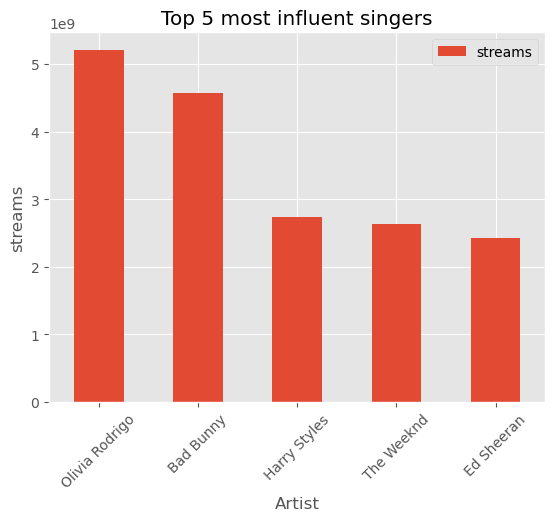

In [117]:
plt.style.use('ggplot')

ax = view_top_5.plot.bar(x = 'artist_names', y = 'streams', rot = 45)
ax.set_title('Top 5 most influent singers')
ax.set(xlabel = 'Artist', ylabel = 'streams')

Vậy có thể thấy `Olivia Rodrigo` chính là ca sĩ có tổng số lượng stream cao nhất thế giới.


**Bước 2**: Lấy thông tin số lượng streams của bài hát mà `Olivia Rodrigo` hát


In [118]:
artist_name = info_streams.groupby(['artist_names'])['streams'].sum().sort_values(ascending= False).idxmax()
info_song = info_streams.loc[info_streams['artist_names'] == artist_name]
info_song


uri    artist_names  streams  \
84       spotify:track:5CZ40GBx1sQ9agT82CLQCT  Olivia Rodrigo   238186   
89       spotify:track:4ZtFanR9U6ndgddUvNcjcG  Olivia Rodrigo   229968   
199      spotify:track:7lPN2DXiMsVn7XUKtOW1CS  Olivia Rodrigo   372101   
254      spotify:track:61KpQadow081I2AsbeLcsb  Olivia Rodrigo   199365   
278      spotify:track:4ZtFanR9U6ndgddUvNcjcG  Olivia Rodrigo   920317   
...                                       ...             ...      ...   
1103524  spotify:track:5wANPM4fQCJwkGd4rN57mH  Olivia Rodrigo    38582   
1103535  spotify:track:4ZtFanR9U6ndgddUvNcjcG  Olivia Rodrigo    35124   
1103624  spotify:track:5wANPM4fQCJwkGd4rN57mH  Olivia Rodrigo    48735   
1103640  spotify:track:6HU7h9RYOaPRFeh0R3UeAr  Olivia Rodrigo    42984   
1103647  spotify:track:4ZtFanR9U6ndgddUvNcjcG  Olivia Rodrigo    40636   

              track_name    country  
84               traitor  Argentina  
89              good 4 u  Argentina  
199      drivers license  Argentina  
254              deja vu  Argentina  
278             good 4 u  Argentina  
...                  ...        ...  
1103524  drivers license    Vietnam  
1103535         good 4 u    Vietnam  
1103624  drivers license    Vietnam  
1103640          deja vu    Vietnam  
1103647         good 4 u    Vietnam  

[16163 rows x 5 columns]

**Bước 3**: Mô hình hoá dữ liệu dể dễ quan sát hơn


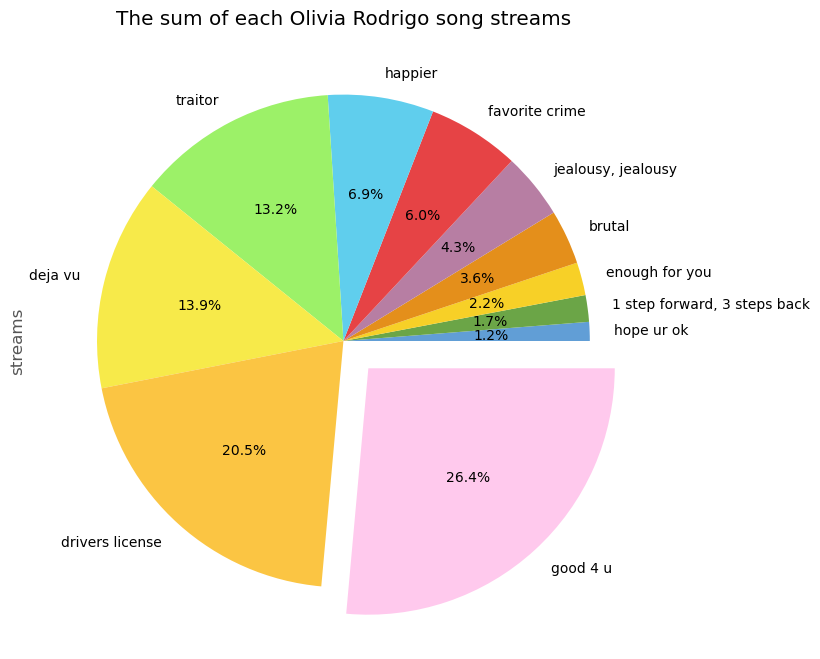

In [119]:
bar_df = info_song.groupby(['track_name'])['streams'].sum().sort_values(ascending=True)
colors = ["#619ED6", "#6BA547", "#F7D027", "#E48F1B", "#B77EA3", "#E64345", "#60CEED", "#9CF168", "#F7EA4A", "#FBC543", "#FFC9ED", "#E6696E"]
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))

bar_df.plot.pie(y=bar_df.index,
           shadow=False,
           colors=colors, 
           explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.15),  
           autopct='%1.1f%%',
           ax = ax)

ax.set_title('The sum of each Olivia Rodrigo song streams')
plt.show()


Vậy có thể thấy nhờ vào bài hát `good 4 u` mà giúp `Olivia Rodrigo` đạt được 1 số lượt streams lớn để trở thành ca sĩ có tầm ảnh hưởng nhất thế giới.

---

### **Câu 5**: Thời lượng của các bài hát nằm trong Top200 thay đổi như thế nào qua các năm ?

**Bước 1:** Đầu tiên ta drop đi các bài hát trùng nhau, sau đó chuyển cột `release_date` thành index và lưu vào dataframe sub_df.

In [120]:
sub_df = spotify_df.sort_values('week').drop_duplicates(subset='uri', keep='last').reset_index(drop=True).set_index('release_date')

**Bước 2:** Chuyển cột `duration` từ milisecond về second

In [121]:
sub_df['duration'] = sub_df['duration'].apply(lambda x: round(x/1000) if pd.notnull(x) else x)

**Bước 3:** Trực quan hoá lên đồ thị lineplot

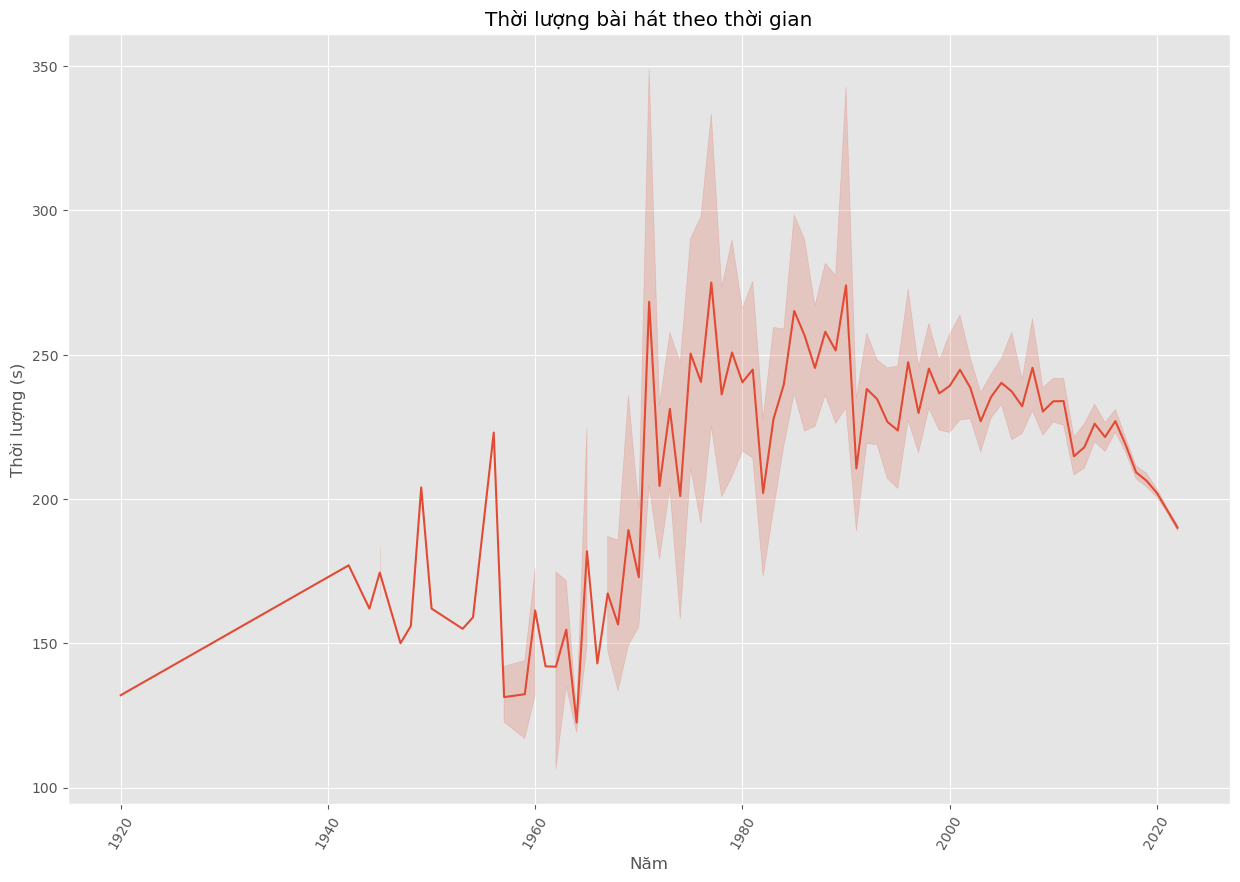

In [122]:
plt.figure(figsize=(15,10))
sns.lineplot(x=sub_df.index.year, y=sub_df['duration'].values).set(title='Thời lượng bài hát theo thời gian')
plt.xlabel('Năm')
plt.ylabel('Thời lượng (s)')
plt.xticks(rotation=60)
plt.show()

---

### **Câu 6**: Tìm sự tương quan giữa các cột cường độ âm thanh?

Ta vẽ biểu đồ heatmap với các hệ số tương quan để xem mối quan hệ của các đặc trưng

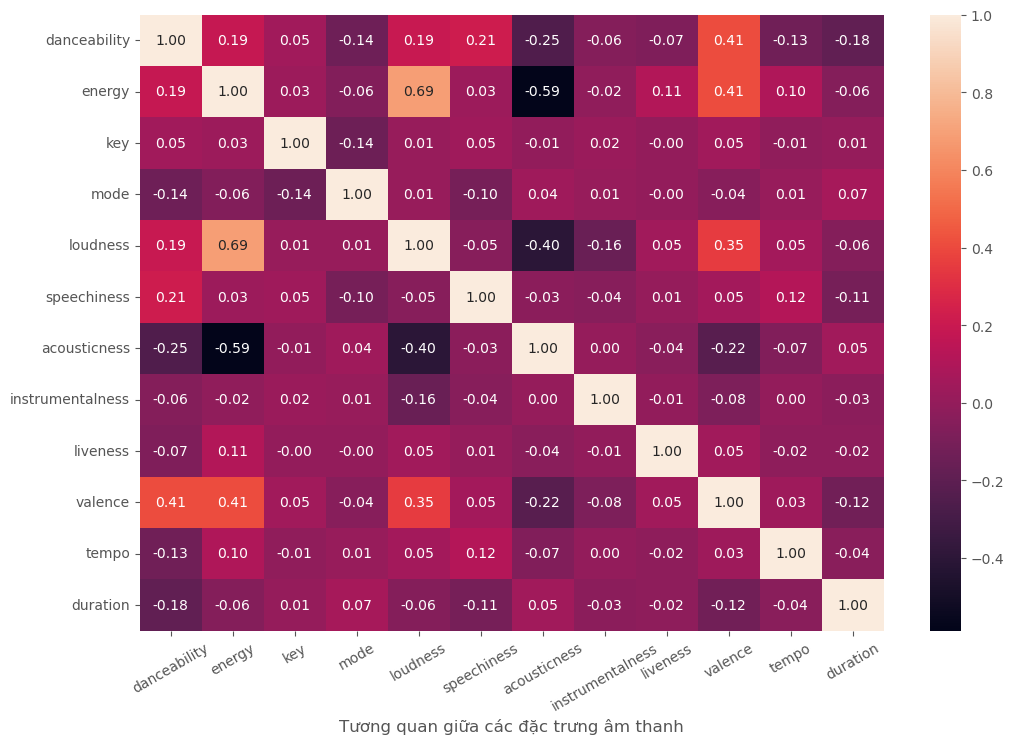

In [123]:
audio_cols = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']
plt.figure(figsize=(12,8))
sns.heatmap(spotify_df[audio_cols].corr(), annot=True, fmt='.2f')
plt.xlabel('Tương quan giữa các đặc trưng âm thanh')
plt.xticks(rotation=30)
plt.show()

- Các đặc trưng có tương quan cao:
    - `loudness` và `energy`
    - `valence` và `danceability`, `energy`, `loudness`
- Tương quan âm:
    - `acousticness` và `energy`
    - `acousticness` và `loudness`

Mối quan hệ giữa các đặc trưng có mức tương quan cao:
- Ta dùng regplot để vẽ lên đường hồi quy với các điểm này
- Dùng sample() của pandas để vẽ lên các điểm dữ liệu ngẫu nhiên

Text(0.5, 1.0, 'Tương quan giữa loudness và energy')

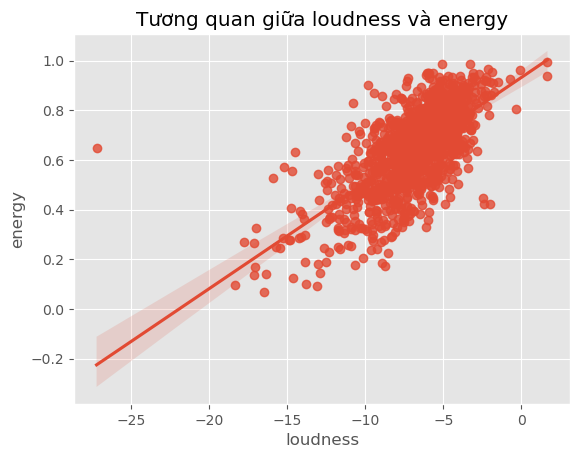

In [124]:
sns.regplot(data=sub_df.sample(round(0.03*len(sub_df))), y='energy', x='loudness')
plt.title('Tương quan giữa loudness và energy')

Text(0.5, 1.0, 'Tương quan giữa acousticness và energy')

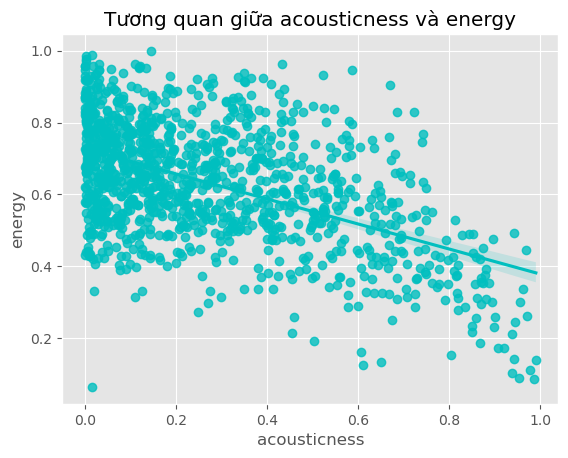

In [125]:
sns.regplot(data=sub_df.sample(round(0.03*len(sub_df))), y='energy', x='acousticness', color='c')
plt.title('Tương quan giữa acousticness và energy')

Có thể thấy các biểu đồ trên gần như fit với đường hồi quy.

Dùng scatter_3d() của plotly để vẽ lên đồ thị 3d biểu diễn mối quan hệ giữa 4 đặc trưng: `loudness`, `energy`, `danceability`, `valence`

In [126]:
fig = px.scatter_3d(sub_df, x='loudness', y='energy', z='danceability',
              color='valence')
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Dựa vào đồ thị, ta thấy được rằng:
- `danceability`, `loudness`, `energy` càng tăng thì `valence` càng lớn

---

### **Câu 7**: Top các thể loại âm nhạc trên thế giới là gì?

Trực quan hoá top 12 các thể loại âm nhạc

(0.0, 100.0, 0.0, 100.0)

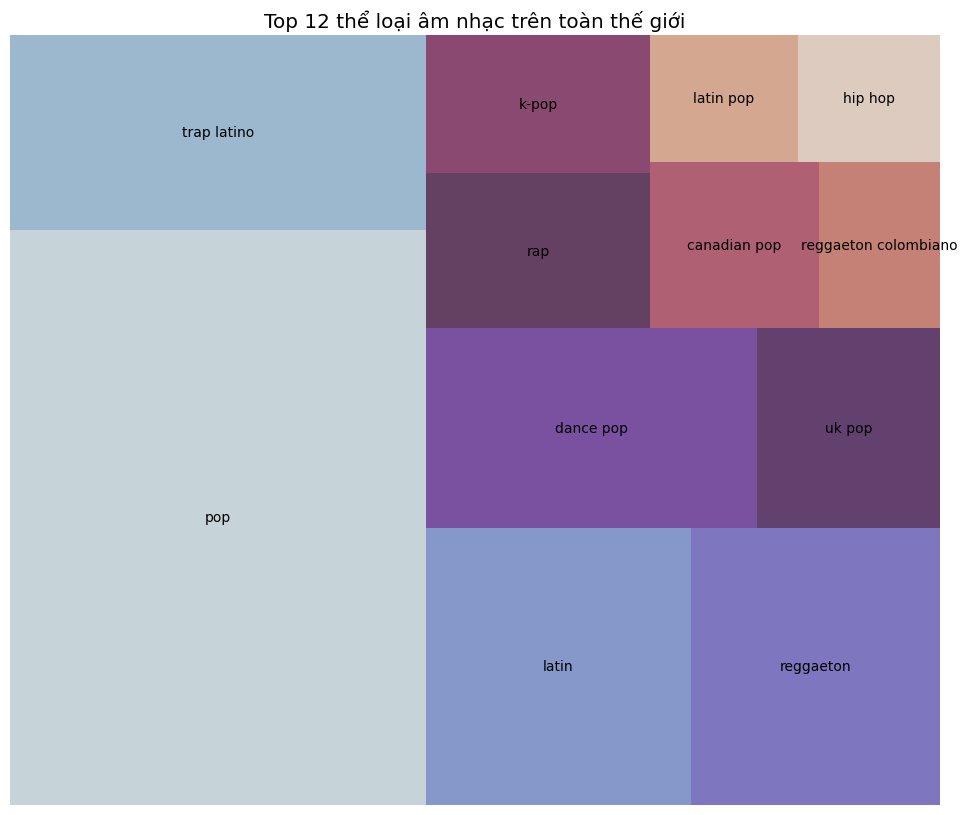

In [127]:
plt.figure(figsize=(12,10))
plot_df = spotify_df[spotify_df['artist_genre']!='0']['artist_genre'].value_counts()[:12]
squarify.plot(sizes=plot_df, label=plot_df.index, color=sns.color_palette('twilight', len(plot_df)), alpha=0.8)
plt.title('Top 12 thể loại âm nhạc trên toàn thế giới')
plt.axis('off')

---

### **Câu 8**: Mức độ ảnh hưởng của spotify trên khắp thế giới theo thời gian?

**Bước 1:** Tạo thêm một cột là `iso_country`: mã iso của các nước

In [128]:
def find_iso_country (country):
    if country=='Global':
        return np.nan
    try:
        return pycountry.countries.get(name=country).alpha_3
    except:
        return pycountry.countries.search_fuzzy(country)[0].alpha_3
sub_df['iso_country'] = sub_df['country'].apply(lambda x: find_iso_country(x))
sub_df

uri  rank    artist_names  \
release_date                                                               
2010-11-19    spotify:track:6YnzBV7YkaXZNCK3tlnCfg   176        Boney M.   
1987-10-30    spotify:track:0HEmnAUT8PHznIAAmVXqFJ   192  George Michael   
1986-11-25    spotify:track:2R7858bg0GHuBBxjTyOL7N   164  George Michael   
2015-07-01    spotify:track:7wiESxCGoUkRdgZF2JOLZu   137    The Ronettes   
2015-05-18    spotify:track:494OU6M7NOf4ICYb4zWCf5   198        Maroon 5   
...                                            ...   ...             ...   
2022-06-03    spotify:track:6ipzb1kHhWIxp1tS0vwqPl    54            Feid   
2021-07-08    spotify:track:4HzqWEdAbzcVFDv0pvxV4w    55          Maluma   
2021-12-10    spotify:track:3rdAz1fbUfZxYgaCviYhRo    56  Rauw Alejandro   
2018-10-25    spotify:track:4khWEpnaijN0G1x019Uzdr    41           Morat   
2022-06-10    spotify:track:6xGruZOHLs39ZbVccQTuPZ     2            Joji   

              artists_num artist_individual  \
release_date                                  
2010-11-19              1          Boney M.   
1987-10-30              1    George Michael   
1986-11-25              1    George Michael   
2015-07-01              1      Phil Spector   
2015-05-18              1          Maroon 5   
...                   ...               ...   
2022-06-03              1              Feid   
2021-07-08              1            Maluma   
2021-12-10              1    Rauw Alejandro   
2018-10-25              1             Morat   
2022-06-10              1              Joji   

                                          artist_id          artist_genre  \
release_date                                                                
2010-11-19    spotify:artist:54R6Y0I7jGUCveDTtI21nb                 disco   
1987-10-30    spotify:artist:19ra5tSw0tWufvUp8GotLo                     0   
1986-11-25    spotify:artist:19ra5tSw0tWufvUp8GotLo                     0   
2015-07-01    spotify:artist:3jVMgT4X7YeuYE4aludcmE    brill building pop   
2015-05-18    spotify:artist:04gDigrS5kc9YWfZHwBETP                   pop   
...                                             ...                   ...   
2022-06-03    spotify:artist:2LRoIwlKmHjgvigdNGBHNo                 latin   
2021-07-08    spotify:artist:1r4hJ1h58CWwUQe3MxPuau  reggaeton colombiano   
2021-12-10    spotify:artist:1mcTU81TzQhprhouKaTkpq      puerto rican pop   
2018-10-25    spotify:artist:5C4PDR4LnhZTbVnKWXuDKD                 latin   
2022-06-10    spotify:artist:3MZsBdqDrRTJihTHQrO6Dq             viral pop   

                                                     artist_img  \
release_date                                                      
2010-11-19    https://i.scdn.co/image/94f8fa49e6ac6748393ff0...   
1987-10-30    https://i.scdn.co/image/ab6761610000e5ebf8b74c...   
1986-11-25    https://i.scdn.co/image/ab6761610000e5ebf8b74c...   
2015-07-01    https://i.scdn.co/image/a7b5f60f463d8e301b0f92...   
2015-05-18    https://i.scdn.co/image/ab6761610000e5eb288ac0...   
...                                                         ...   
2022-06-03    https://i.scdn.co/image/ab6761610000e5ebe9cf86...   
2021-07-08    https://i.scdn.co/image/ab6761610000e5eb96a9fa...   
2021-12-10    https://i.scdn.co/image/ab6761610000e5eb754fd1...   
2018-10-25    https://i.scdn.co/image/ab6761610000e5eb6847cf...   
2022-06-10    https://i.scdn.co/image/ab6761610000e5eb4111c9...   

                                 track_name  album_num_tracks  \
release_date                                                    
2010-11-19    Mary's Boy Child / Oh My Lord               2.0   
1987-10-30               Faith - Remastered              10.0   
1986-11-25                 Careless Whisper              14.0   
2015-07-01                      Sleigh Ride              13.0   
2015-05-18                            Sugar              16.0   
...                                     ...               ...   
2022-06-03                       Ferxxo 100         

**Bước 2:** Tạo một dataframe mới `map_df` là tổng các lượt streams theo đất nước, tuần lên top, vùng

In [129]:
map_df = pd.DataFrame(sub_df.groupby(['country', sub_df['week'].dt.strftime('%Y-%m'), 'iso_country', 'region'])['streams'].sum())
map_df = map_df.reset_index()
map_df

country     week iso_country         region   streams
0     Argentina  2021-02         ARG  South America   2841277
1     Argentina  2021-03         ARG  South America   2338497
2     Argentina  2021-04         ARG  South America   4059419
3     Argentina  2021-05         ARG  South America   2472949
4     Argentina  2021-06         ARG  South America    764044
...         ...      ...         ...            ...       ...
1220    Vietnam  2022-03         VNM           Asia   2922929
1221    Vietnam  2022-04         VNM           Asia   1577101
1222    Vietnam  2022-05         VNM           Asia   1026303
1223    Vietnam  2022-06         VNM           Asia   2213350
1224    Vietnam  2022-07         VNM           Asia  12374051

[1225 rows x 5 columns]

**Bước 3:** Trực quan hoá lên biểu đồ map với trục thời gian là các tháng

In [130]:
fig = px.choropleth(map_df, locations='iso_country', #locationmode='region',
                    color='streams', 
                    hover_name='country', 
                    color_continuous_scale=px.colors.sequential.Greens,  animation_frame='week')
fig.show()

---

### **Câu 9**: Số lượng bài hát ra mắt mỗi năm nằm trong top 200?

Text(0.5, 1.0, 'Số lượng bài hát ra mắt mỗi năm nằm trong top 200')

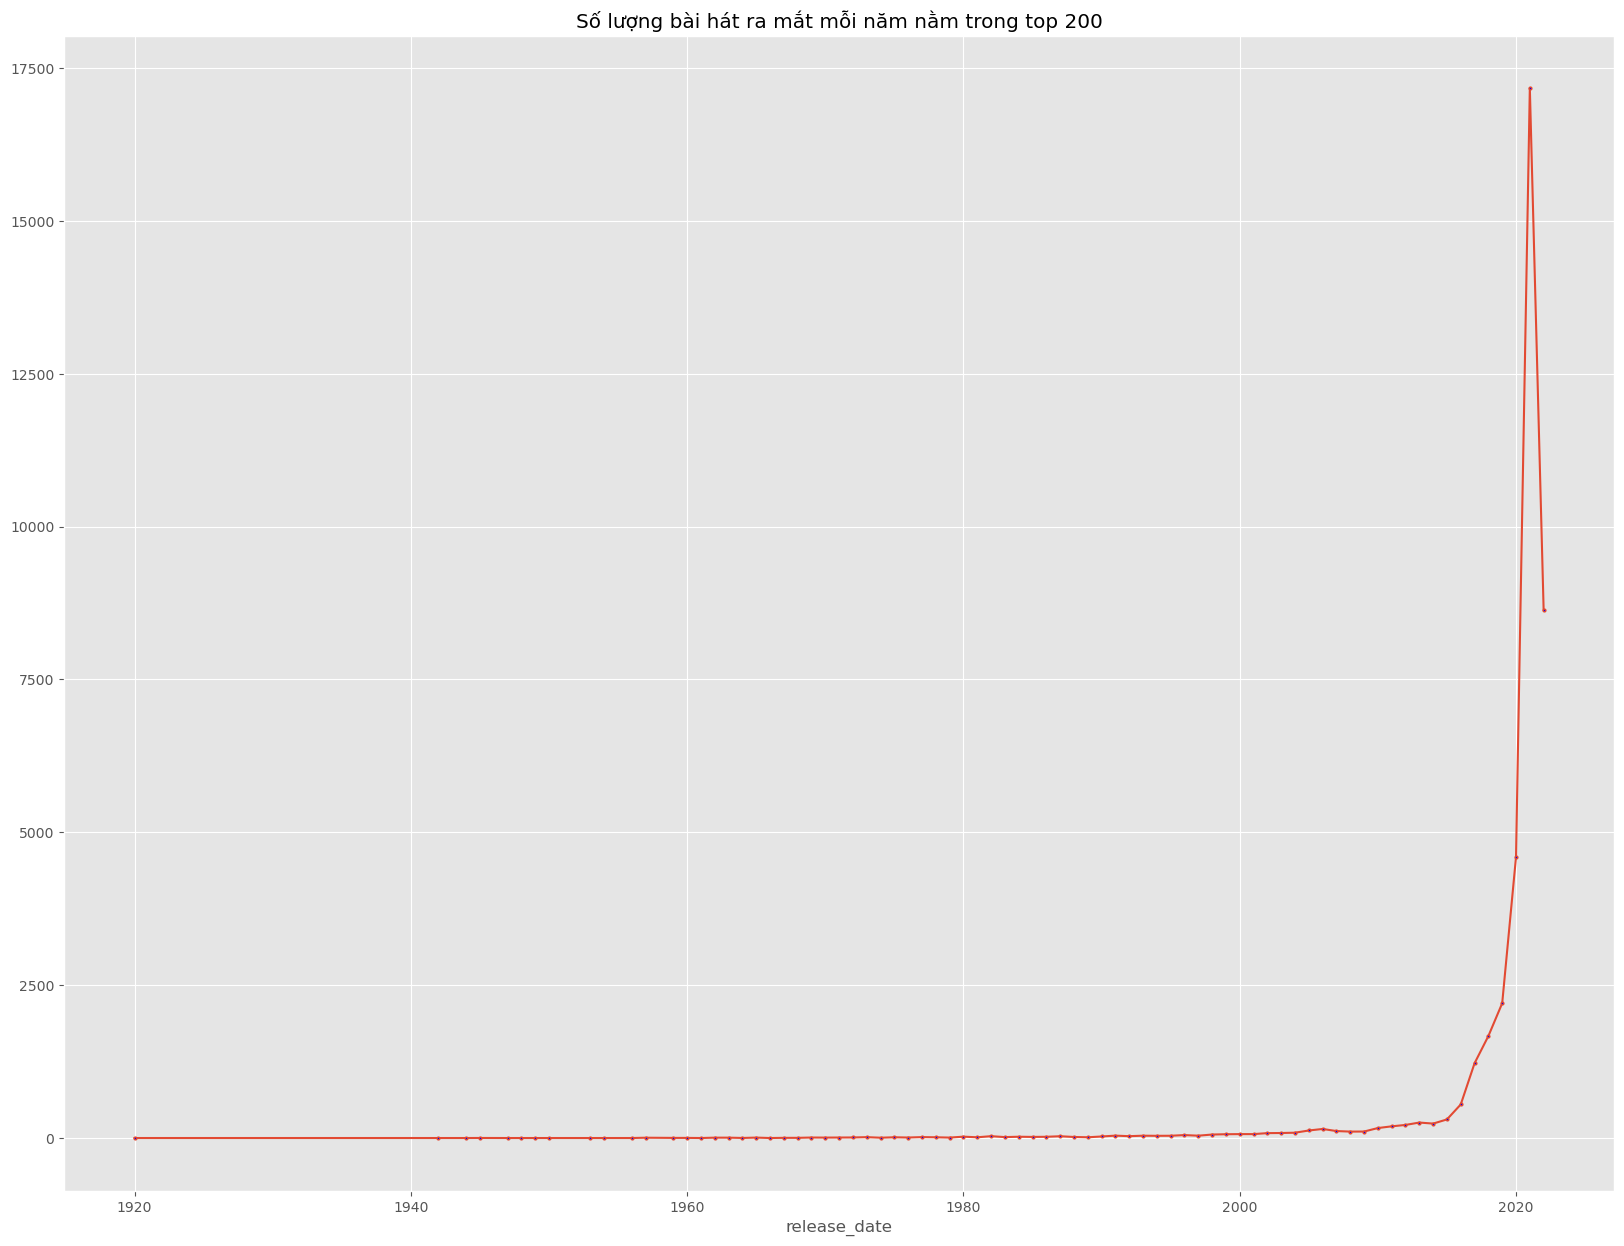

In [131]:
plt.figure(figsize=(20,15))
sub_df.groupby(sub_df.index.year)['uri'].count().plot(marker='o', markersize=2, markerfacecolor='blue')
plt.title('Số lượng bài hát ra mắt mỗi năm nằm trong top 200')